In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_excel('.\ODH_metal.xlsx')
data.head()

,序号,催化剂引用的文献,催化剂种类,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,...,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel,丙烯产率
0,NaN,"Angew. Chem. Int. Ed. 2009, 48(37), 6913–6917....",V-Al2O3,V,1.0,1.63,NaN,NaN,NaN,NaN,...,28.6,14.3,57.1,1.0,2,3600.0,400,3.0,80.0,0.02400
1,NaN,"Angew. Chem. Int. Ed. 2009, 48(37), 6913–6917....",V-Al2O3,V,1.0,1.63,NaN,NaN,NaN,NaN,...,28.6,14.3,57.1,1.0,2,3600.0,400,12.3,55.0,0.06765
2,NaN,"Angew. Chem. Int. Ed. 2009, 48(37), 6913–6917....",V-TiO2,V,1.0,1.63,NaN,NaN,NaN,NaN,...,28.6,14.3,57.1,1.0,2,3600.0,400,1.8,77.0,0.01386
3,NaN,"Angew. Chem. Int. Ed. 2009, 48(37), 6913–6917....",V-TiO2,V,1.0,1.63,NaN,NaN,NaN,NaN,...,28.6,14.3,57.1,1.0,2,3600.0,400,7.0,48.0,0.03360
4,NaN,"Angew. Chem. Int. Ed. 2009, 48(37), 6913–6917....",V-CeO2,V,1.0,1.63,NaN,NaN,NaN,NaN,...,28.6,14.3,57.1,1.0,2,3600.0,400,1.8,69.0,0.01242


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   序号        0 non-null      float64
 1   催化剂引用的文献  275 non-null    object 
 2   催化剂种类     274 non-null    object 
 3   金属1       255 non-null    object 
 4   占比1       255 non-null    float64
 5   金属1电负性    10 non-null     float64
 6   金属2       7 non-null      object 
 7   占比2       7 non-null      float64
 8   金属2电负性    0 non-null      float64
 9   非金属1      0 non-null      float64
 10  占比3       0 non-null      float64
 11  负载1       270 non-null    object 
 12  占比4       270 non-null    float64
 13  C2H6      0 non-null      float64
 14  C3H8      275 non-null    float64
 15  O2        275 non-null    float64
 16  保护气体      275 non-null    float64
 17  金属基       255 non-null    float64
 18  形态        275 non-null    int64  
 19  GHSV      146 non-null    float64
 20  温度        275 non-null    int64 

In [4]:
data=data.loc[:,'金属1':'Sel']
data

,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,占比3,负载1,占比4,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,Al2O3,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.0,400,3.0,80.0
1,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,Al2O3,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.0,400,12.3,55.0
2,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,TiO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.0,400,1.8,77.0
3,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,TiO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.0,400,7.0,48.0
4,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,CeO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.0,400,1.8,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mo,4.27,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,95.73,NaN,29.4,9.6,61.0,1.0,2,NaN,605,5.0,77.0
271,Mo,9.38,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,90.62,NaN,29.4,9.6,61.0,1.0,2,NaN,597,5.0,80.0
272,Mo,14.80,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,85.20,NaN,29.4,9.6,61.0,1.0,2,NaN,633,5.0,78.0
273,Mo,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,9.6,61.0,1.0,1,NaN,629,5.0,64.0


In [5]:
data.loc[:,'GHSV'].fillna(data.loc[:,'GHSV'].mean(),inplace=True)
data.loc[:,'Con'].fillna(data.loc[:,'Con'].mean(),inplace=True)
data.loc[:,'Sel'].fillna(data.loc[:,'Sel'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   金属1     255 non-null    object 
 1   占比1     255 non-null    float64
 2   金属1电负性  10 non-null     float64
 3   金属2     7 non-null      object 
 4   占比2     7 non-null      float64
 5   金属2电负性  0 non-null      float64
 6   非金属1    0 non-null      float64
 7   占比3     0 non-null      float64
 8   负载1     270 non-null    object 
 9   占比4     270 non-null    float64
 10  C2H6    0 non-null      float64
 11  C3H8    275 non-null    float64
 12  O2      275 non-null    float64
 13  保护气体    275 non-null    float64
 14  金属基     255 non-null    float64
 15  形态      275 non-null    int64  
 16  GHSV    275 non-null    float64
 17  温度      275 non-null    int64  
 18  Con     275 non-null    float64
 19  Sel     275 non-null    float64
dtypes: float64(15), int64(2), object(3)
memory usage: 43.1+ KB


In [6]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 3]])))
data1

[nan, 'Na', 'V', 'Li', 'K', 'Mo']

In [7]:
data_1 = pd.DataFrame(np.zeros((275, 6)), columns=data1)
data_1

,NaN,Na,V,Li,K,Mo
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
270,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0
272,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 3]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 4]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [9]:
data

,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,占比3,负载1,占比4,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,Al2O3,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,3.0,80.0
1,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,Al2O3,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,12.3,55.0
2,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,TiO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,1.8,77.0
3,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,TiO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,7.0,48.0
4,V,1.00,1.63,NaN,NaN,NaN,NaN,NaN,CeO2,99.00,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,1.8,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mo,4.27,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,95.73,NaN,29.4,9.6,61.0,1.0,2,22828.986301,605,5.0,77.0
271,Mo,9.38,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,90.62,NaN,29.4,9.6,61.0,1.0,2,22828.986301,597,5.0,80.0
272,Mo,14.80,NaN,NaN,NaN,NaN,NaN,NaN,TiO2,85.20,NaN,29.4,9.6,61.0,1.0,2,22828.986301,633,5.0,78.0
273,Mo,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,9.6,61.0,1.0,1,22828.986301,629,5.0,64.0


In [10]:
data2 = list(set(data.iloc[:, 6]))
len(data2)

275

In [11]:
# data_2 = pd.DataFrame(np.zeros((514, 10)), columns=data2)

In [12]:
# num_1 = 0
# for i in data.iloc[:, 6]:
#     if i in data2:
#         index_2 = data2.index(i)
#         index_1 = num_1
#         data_2.iloc[index_1, index_2] = data.iloc[num_1, 7]
#         num_1 = num_1 + 1
# data_2 = data_2.dropna(axis=1)

In [13]:
# data_2.head()

In [14]:
data3 = list(set(data.iloc[:, 8]))
len(data3)

14

In [15]:
data_3 = pd.DataFrame(np.zeros((275,14)), columns=data3)

In [16]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data3:
        index_2 = data3.index(i)
        index_1 = num_1
        data_3.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
data_3 = data_3.dropna(axis=1)

In [17]:
data_3

,MCM,ZrO2,SBA-15,MCF,SBA-16,MgO,MCM-41,CeO2,Nb2O5,Al2O3,HMS,SiO2,TiO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.73
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.62
272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.20
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [18]:
data_use=pd.concat([data_1,data_3,data.loc[:,'C2H6':'Sel']],axis=1)
data_use

,Na,V,Li,K,Mo,MCM,ZrO2,SBA-15,MCF,SBA-16,...,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,3.0,80.0
1,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,12.3,55.0
2,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,1.8,77.0
3,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,7.0,48.0
4,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,28.6,14.3,57.1,1.0,2,3600.000000,400,1.8,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.0,0.00,0.0,0.0,4.27,0.0,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,22828.986301,605,5.0,77.0
271,0.0,0.00,0.0,0.0,9.38,0.0,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,22828.986301,597,5.0,80.0
272,0.0,0.00,0.0,0.0,14.80,0.0,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,2,22828.986301,633,5.0,78.0
273,0.0,0.00,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,...,NaN,29.4,9.6,61.0,1.0,1,22828.986301,629,5.0,64.0


In [19]:
data_use.fillna(0,inplace=True)
data_use=data_use.drop(['金属基'],axis=1)
data_use

,Na,V,Li,K,Mo,MCM,ZrO2,SBA-15,MCF,SBA-16,...,TiO2,C2H6,C3H8,O2,保护气体,形态,GHSV,温度,Con,Sel
0,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,28.6,14.3,57.1,2,3600.000000,400,3.0,80.0
1,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,28.6,14.3,57.1,2,3600.000000,400,12.3,55.0
2,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,99.00,0.0,28.6,14.3,57.1,2,3600.000000,400,1.8,77.0
3,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,99.00,0.0,28.6,14.3,57.1,2,3600.000000,400,7.0,48.0
4,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,28.6,14.3,57.1,2,3600.000000,400,1.8,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.0,0.00,0.0,0.0,4.27,0.0,0.0,0.0,0.0,0.0,...,95.73,0.0,29.4,9.6,61.0,2,22828.986301,605,5.0,77.0
271,0.0,0.00,0.0,0.0,9.38,0.0,0.0,0.0,0.0,0.0,...,90.62,0.0,29.4,9.6,61.0,2,22828.986301,597,5.0,80.0
272,0.0,0.00,0.0,0.0,14.80,0.0,0.0,0.0,0.0,0.0,...,85.20,0.0,29.4,9.6,61.0,2,22828.986301,633,5.0,78.0
273,0.0,0.00,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,29.4,9.6,61.0,1,22828.986301,629,5.0,64.0


In [20]:
data_use.to_csv('use_M.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


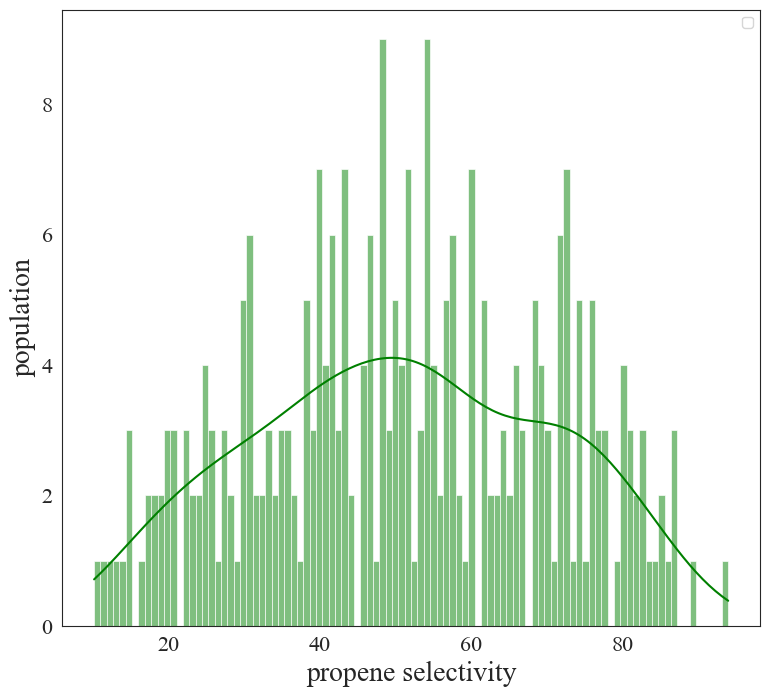

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Sel'],color='g',bins=100,kde=True)
plt.xlabel('propene selectivity',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('population',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.legend()
plt.show()

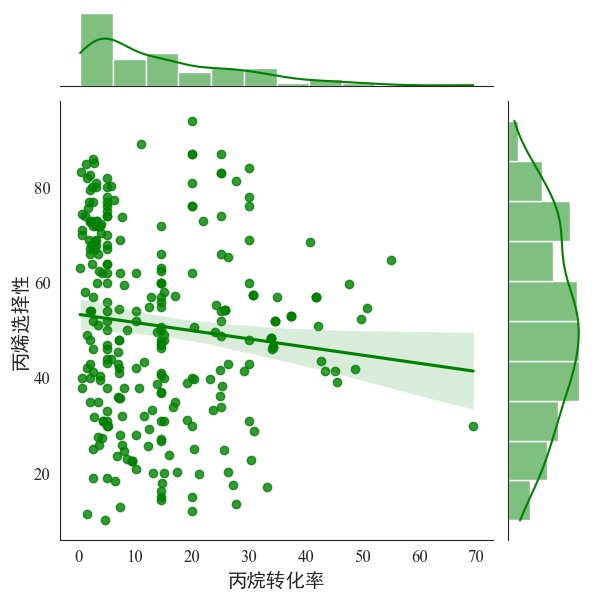

In [22]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Con",y="Sel",data=data,kind='reg',color='g')
plt.xlabel('丙烷转化率',fontsize=14)
plt.ylabel('丙烯选择性',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

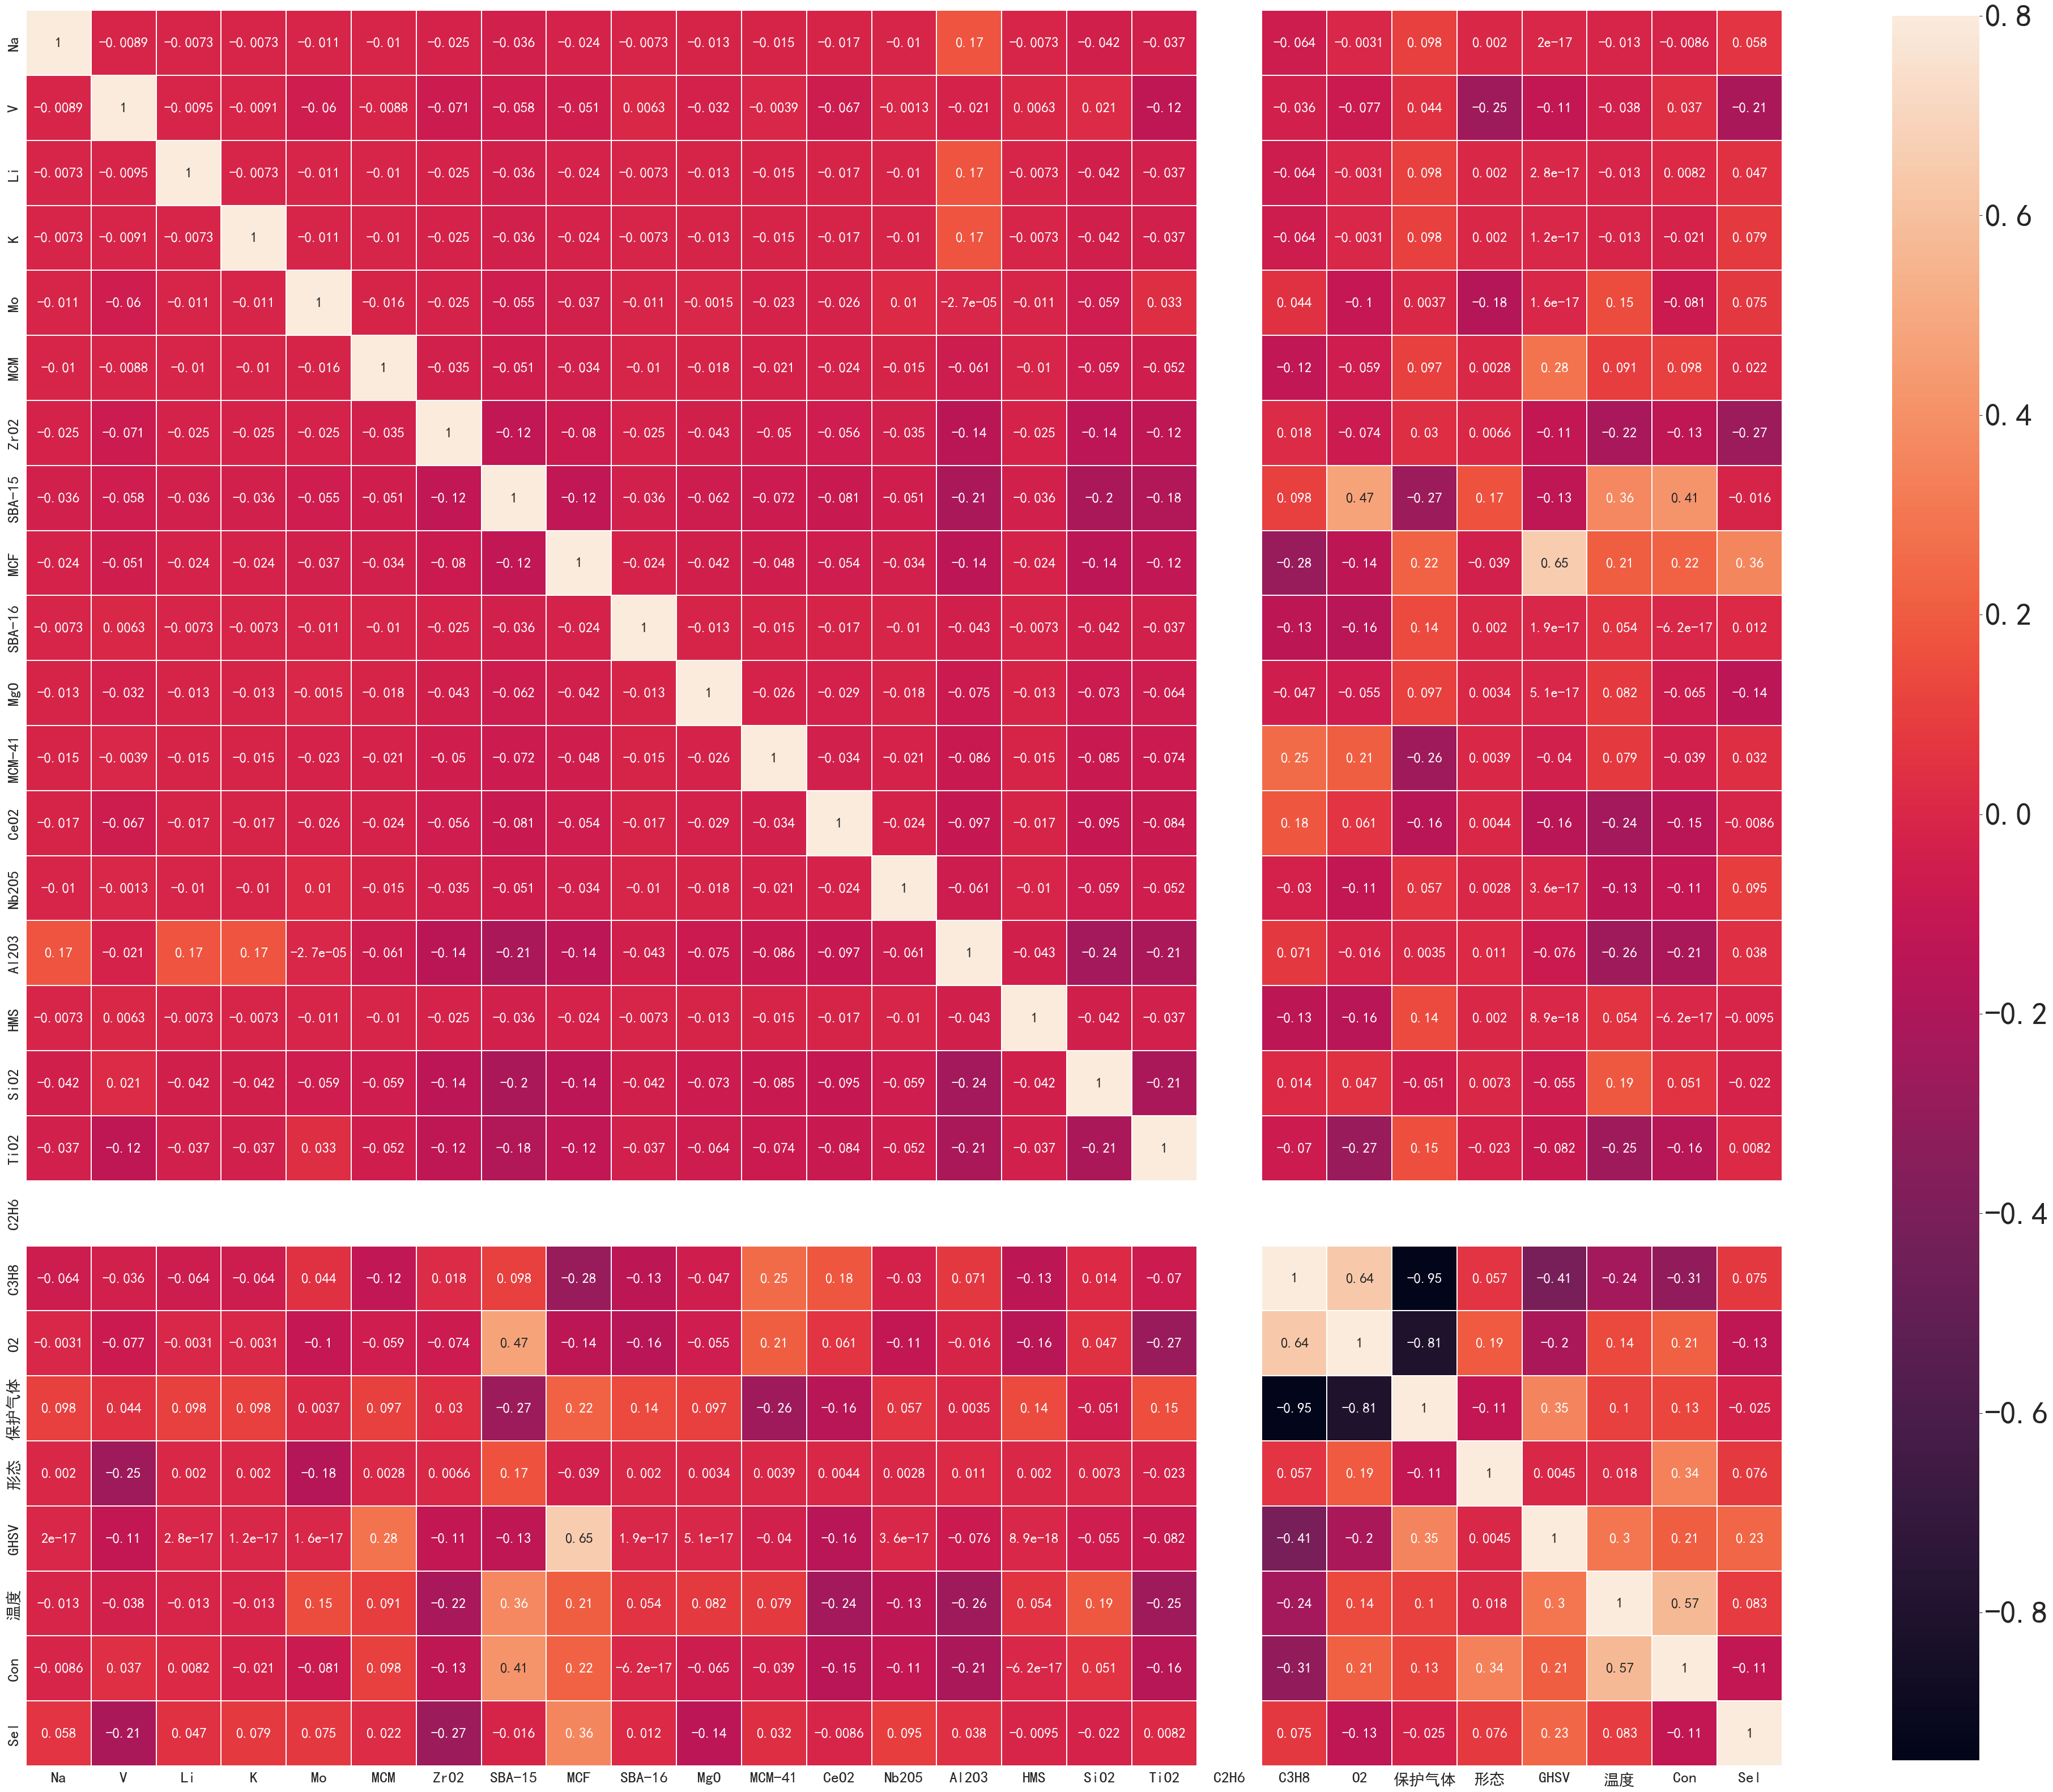

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data_use.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()